____

### Attribute Information:
1.	BI-RADS assessment: 1 to 5 (ordinal, non-predictive!)
2.	Age: patient's age in years (integer)
3.	Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4.	Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5.	Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6.	Severity: benign=0 or malignant=1 (binominal, goal field!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
# Loading the Train Dataset
train_data = pd.read_csv("D:\Data\Machine_Learning\casestudy001\Train.csv")

In [6]:
# Loading the Test Dataset
test_data = pd.read_csv("D:\Data\Machine_Learning\casestudy001\Test.csv")

In [7]:
train_data.head()
test_data.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1


,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5,65.0,lobular,ill-defined,low,1
1,2,5,74.0,lobular,microlobulated,low,1
2,3,4,NaN,oval,circumscribed,low,0
3,4,4,57.0,irregular,ill-defined,fat-containing,1
4,5,4,76.0,lobular,microlobulated,low,0


In [8]:
train_data.shape
test_data.shape

(811, 7)

(150, 7)

In [9]:
train_data.drop(['Index'], axis=1, inplace=True)
test_data.drop(['Index'], axis=1, inplace=True)

In [10]:
# Checking the Train data and test data info()
train_data.info()
print('=='*30)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       809 non-null    float64
 1   Age           723 non-null    float64
 2   Shape         781 non-null    object 
 3   Margin        764 non-null    object 
 4   Mass_Density  735 non-null    object 
 5   Severity      811 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 38.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       150 non-null    int64  
 1   Age           138 non-null    float64
 2   Shape         149 non-null    object 
 3   Margin        149 non-null    object 
 4   Mass_Density  150 non-null    object 
 5   Severity      150 non-null    int64  
dtypes: float64(1), int64(2), object(3)
m

In [11]:
print('Train Data Describe: ')
train_data.describe()
print('Test Data Describe: ')
test_data.describe()

Train Data Describe: 


,BI_RADS,Age,Severity
count,809.000000,723.000000,811.000000
mean,4.379481,55.887967,0.459926
std,1.914800,16.886616,0.498699
min,0.000000,5.000000,0.000000
25%,4.000000,45.000000,0.000000
50%,4.000000,56.000000,0.000000
75%,5.000000,66.000000,1.000000
max,55.000000,130.000000,1.000000


Test Data Describe: 


,BI_RADS,Age,Severity
count,150.000000,138.000000,150.000000
mean,4.180000,55.717391,0.480000
std,0.724175,17.460274,0.501274
min,0.000000,19.000000,0.000000
25%,4.000000,45.000000,0.000000
50%,4.000000,56.000000,0.000000
75%,4.000000,65.000000,1.000000
max,6.000000,130.000000,1.000000


## Data Cleaning

### Checking the Duplicate values

In [12]:
train_data.duplicated().value_counts()
test_data.duplicated().value_counts()

False    597
True     214
dtype: int64

False    136
True      14
dtype: int64

In [13]:
# Droping the duplicates from train data and test data.

train_data.drop_duplicates(keep = 'first', inplace=True)
train_data.reset_index(inplace=True)

test_data.drop_duplicates(keep = 'first', inplace=True)
test_data.reset_index(inplace=True)

In [14]:
train_data.head()
test_data.head()

,index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,0,5.0,67.0,lobular,spiculated,low,1
1,1,4.0,43.0,round,circumscribed,NaN,1
2,2,5.0,58.0,irregular,spiculated,low,1
3,3,4.0,28.0,round,circumscribed,low,0
4,4,5.0,74.0,round,spiculated,NaN,1


,index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,0,5,65.0,lobular,ill-defined,low,1
1,1,5,74.0,lobular,microlobulated,low,1
2,2,4,NaN,oval,circumscribed,low,0
3,3,4,57.0,irregular,ill-defined,fat-containing,1
4,4,4,76.0,lobular,microlobulated,low,0


In [15]:
train_data.drop(['index'], axis=1, inplace=True)
test_data.drop(['index'], axis=1, inplace=True)

### Checking the null values in the training data

In [16]:
print('Train Data Null Values in percentages: ')
(train_data.isna().sum()/len(train_data))*100

Train Data Null Values in percentages: 


BI_RADS          0.335008
Age              7.202680
Shape            5.025126
Margin           7.872697
Mass_Density    11.725293
Severity         0.000000
dtype: float64

#### In train there are more than 5% null values in the data set so i am choosing the mean or median to fill the null values.

In [17]:
train_data.Margin.mode().values[0]
train_data.Shape.mode().values[0]
train_data.Mass_Density.mode().values[0]

'circumscribed'

'irregular'

'low'

In [18]:
print('Mean:')
train_data.mean()
print('Median:')
train_data.median()

Mean:


BI_RADS      4.357983
Age         55.842960
Severity     0.448911
dtype: float64

Median:


BI_RADS      4.0
Age         57.0
Severity     0.0
dtype: float64

In [19]:
# filling the null values using mean, median and mode.
# For the Numerical columns we use mean and median to fill the null values.
# For the categorical columns we use mode to fill the null values.

train_data.BI_RADS.fillna(train_data.BI_RADS.mean(), inplace=True)
train_data.Age.fillna(train_data.Age.mean(), inplace=True)
train_data.Shape.fillna(train_data.Shape.mode().values[0], inplace=True)
train_data.Margin.fillna(train_data.Margin.mode().values[0], inplace=True)
train_data.Mass_Density.fillna(train_data.Mass_Density.mode().values[0], inplace=True)

In [20]:
(train_data.isna().sum()/len(train_data))*100

BI_RADS         0.0
Age             0.0
Shape           0.0
Margin          0.0
Mass_Density    0.0
Severity        0.0
dtype: float64

### Checking the null values in the test data

In [21]:
(test_data.isna().sum()/len(test_data))*100

BI_RADS         0.000000
Age             6.617647
Shape           0.735294
Margin          0.735294
Mass_Density    0.000000
Severity        0.000000
dtype: float64

In [22]:
test_data.Margin.mode().values[0]
test_data.Shape.mode().values[0]
test_data.Mass_Density.mode().values[0]

'circumscribed'

'irregular'

'low'

In [23]:
print('Mean:')
test_data.mean()
print('Median:')
test_data.median()

Mean:


BI_RADS      4.176471
Age         56.362205
Severity     0.500000
dtype: float64

Median:


BI_RADS      4.0
Age         57.0
Severity     0.5
dtype: float64

In [24]:
test_data.Age.fillna(test_data.Age.mean(), inplace=True)
test_data.Shape.fillna(test_data.Shape.mode().values[0], inplace=True)
test_data.Margin.fillna(test_data.Margin.mode().values[0], inplace=True)

In [25]:
(test_data.isna().sum()/len(test_data))*100

BI_RADS         0.0
Age             0.0
Shape           0.0
Margin          0.0
Mass_Density    0.0
Severity        0.0
dtype: float64

In [26]:
train_data.BI_RADS = train_data.BI_RADS.astype(int)
train_data.Age = train_data.Age.astype(int)
test_data.Age = test_data.Age.astype(int)

In [27]:
# Checking for the Corrupted values
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BI_RADS       597 non-null    int32 
 1   Age           597 non-null    int32 
 2   Shape         597 non-null    object
 3   Margin        597 non-null    object
 4   Mass_Density  597 non-null    object
 5   Severity      597 non-null    int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 23.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BI_RADS       136 non-null    int64 
 1   Age           136 non-null    int32 
 2   Shape         136 non-null    object
 3   Margin        136 non-null    object
 4   Mass_Density  136 non-null    object
 5   Severity      136 non-null    int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 6.0+ KB

### Checking the Outliers

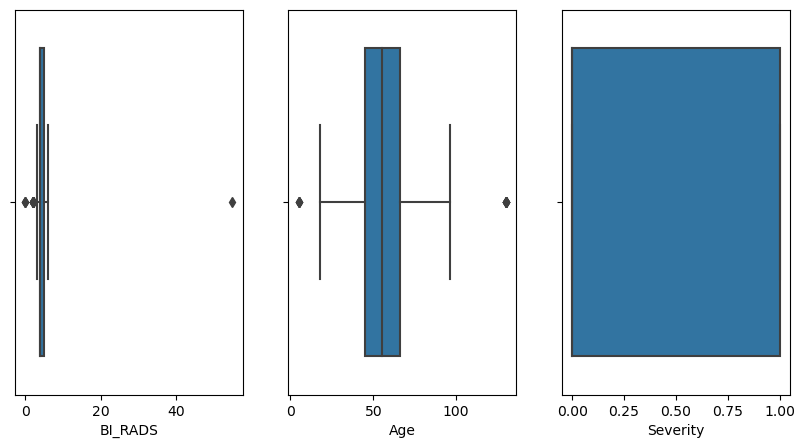

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.boxplot(x=train_data.BI_RADS)

plt.subplot(132)
sns.boxplot(x=train_data.Age)

plt.subplot(133)
sns.boxplot(x=train_data.Severity);

In [29]:
print('IQR Method to detect the outlier in train data of BI_RADS feature :')
Q1, Q2, Q3 = tuple(train_data.BI_RADS.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)
print('IQR Method to detect the outlier in train data of age feature :')
Q4, Q5, Q6 = tuple(train_data.Age.quantile(q = [0.25,0.5,0.75]).values)
print(Q4, Q5, Q6)

IQR Method to detect the outlier in train data of BI_RADS feature :
4.0 4.0 5.0
IQR Method to detect the outlier in train data of age feature :
45.0 55.0 66.0


In [30]:
# Calculating the IQR value and for calculating the LL and UL.
IQR = Q3-Q1
# Checking the outliers in lowerlimit(LL).
UL = Q3+1.5*IQR
# Checking the outliers in upperlimit(UL)
LL = Q1-1.5*IQR
print(IQR,UL,LL)

1.0 6.5 2.5


In [31]:
train_data[(train_data.BI_RADS > UL) | (train_data.BI_RADS < LL)]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
26,2,66,round,circumscribed,low,0
48,2,42,irregular,circumscribed,fat-containing,0
189,2,48,irregular,ill-defined,low,0
198,2,59,round,circumscribed,low,1
208,2,55,round,circumscribed,high,0
244,2,76,round,circumscribed,iso,0
270,2,49,oval,circumscribed,iso,0
295,55,46,irregular,obscured,low,1
330,2,49,irregular,obscured,low,0
376,0,69,irregular,spiculated,low,1


In [32]:
train_data.BI_RADS.unique()

array([ 5,  4,  3,  2, 55,  0,  6])

In [33]:
droplist = train_data[(train_data.BI_RADS == 55) | (train_data.BI_RADS == 0) | (train_data.BI_RADS == 6)].index.to_list()

In [34]:
train_data.drop(droplist,axis= 0, inplace = True)

In [35]:
# Calculating the IQR value and for calculating the LL and UL.
IQR_age = Q6-Q4
# Checking the outliers in lowerlimit(LL).
UL_age = Q6+1.5*IQR
# Checking the outliers in upperlimit(UL)
LL_age = Q4-1.5*IQR
print(IQR_age,UL_age,LL_age)

21.0 67.5 43.5


In [36]:
train_data[(train_data.Age > UL_age) | (train_data.Age < LL_age)]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
1,4,43,round,circumscribed,low,1
3,4,28,round,circumscribed,low,0
4,5,74,round,spiculated,low,1
6,4,70,irregular,circumscribed,low,0
7,5,42,round,circumscribed,low,0
...,...,...,...,...,...,...
585,4,43,round,circumscribed,low,1
586,4,41,irregular,obscured,iso,1
587,4,42,lobular,ill-defined,iso,0
592,5,83,irregular,ill-defined,iso,1


In [34]:
print('IQR Method to detect the outlier in test data of BI_RADS feature :')
Q1, Q2, Q3 = tuple(test_data.BI_RADS.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)
print('IQR Method to detect the outlier in test data of age feature :')
Q4, Q5, Q6 = tuple(test_data.Age.quantile(q = [0.25,0.5,0.75]).values)
print(Q4, Q5, Q6)

IQR Method to detect the outlier in test data of BI_RADS feature :
4.0 4.0 4.0
IQR Method to detect the outlier in test data of age feature :
46.75 56.0 65.0


In [37]:
test_data[(test_data.BI_RADS > UL) | (test_data.BI_RADS < LL)]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
57,2,23,round,circumscribed,low,0
79,0,45,oval,ill-defined,low,0
128,0,71,irregular,ill-defined,low,1


In [38]:
test_data.BI_RADS.unique()

array([5, 4, 6, 2, 3, 0], dtype=int64)

In [39]:
test_data[(test_data.BI_RADS == 0) | (test_data.BI_RADS == 6)]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
13,6,40,irregular,obscured,fat-containing,1
21,6,72,irregular,obscured,low,1
75,6,41,lobular,obscured,iso,1
79,0,45,oval,ill-defined,low,0
128,0,71,irregular,ill-defined,low,1


In [40]:
droplist1 = train_data[(train_data.BI_RADS == 0) | (train_data.BI_RADS == 6)].index.to_list()

In [41]:
train_data.drop(droplist1,axis= 0, inplace = True)

In [42]:
# Calculating the IQR value and for calculating the LL and UL.
IQR_age = Q6-Q4
# Checking the outliers in lowerlimit(LL).
UL_age = Q6+1.5*IQR
# Checking the outliers in upperlimit(UL)
LL_age = Q4-1.5*IQR
print(IQR_age,UL_age,LL_age)

21.0 67.5 43.5


In [43]:
test_data[(test_data.Age > UL_age) | (test_data.Age < LL_age)]

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
1,5,74,lobular,microlobulated,low,1
4,4,76,lobular,microlobulated,low,0
7,4,42,lobular,circumscribed,iso,0
10,4,70,oval,circumscribed,low,0
13,6,40,irregular,obscured,fat-containing,1
16,5,130,irregular,obscured,low,1
17,4,27,round,circumscribed,low,0
18,4,71,irregular,spiculated,iso,1
19,5,130,irregular,ill-defined,low,1
21,6,72,irregular,obscured,low,1


# Analysis

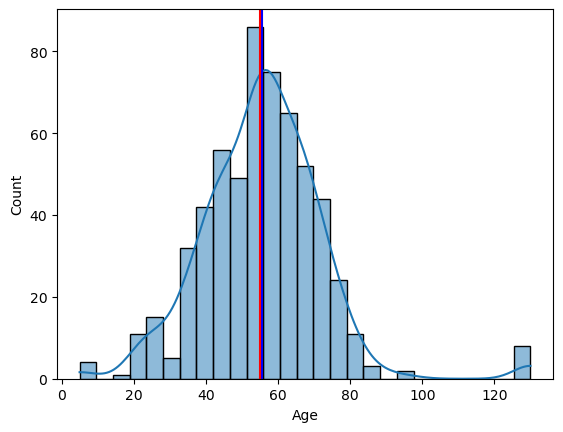

In [44]:
# Checking the mean or median ti be choose by ploting the histogram with kde.
sns.histplot(train_data.Age, kde=True)
plt.axvline(train_data.Age.mean(), color = 'blue')
plt.axvline(train_data.Age.median(), color = 'red');

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 596
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BI_RADS       585 non-null    int32 
 1   Age           585 non-null    int32 
 2   Shape         585 non-null    object
 3   Margin        585 non-null    object
 4   Mass_Density  585 non-null    object
 5   Severity      585 non-null    int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 27.4+ KB


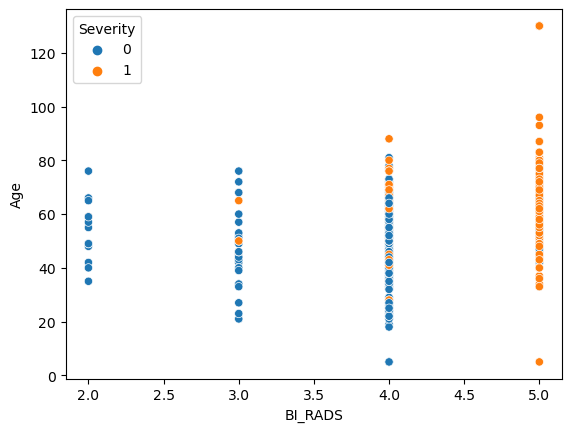

In [46]:
sns.scatterplot(y= train_data.Age,x=train_data.BI_RADS,hue=train_data.Severity);

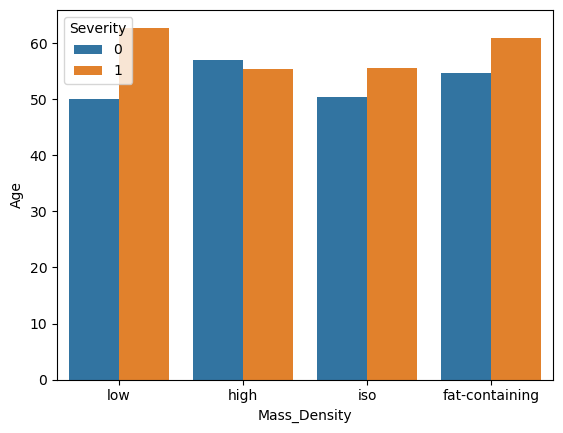

In [47]:
sns.barplot(y=train_data.Age, x=train_data.Mass_Density,hue=train_data.Severity, ci=False);

In [48]:
train_data['Severity'].value_counts()

0    325
1    260
Name: Severity, dtype: int64

In [49]:
test_data['Severity'].value_counts()

1    68
0    68
Name: Severity, dtype: int64

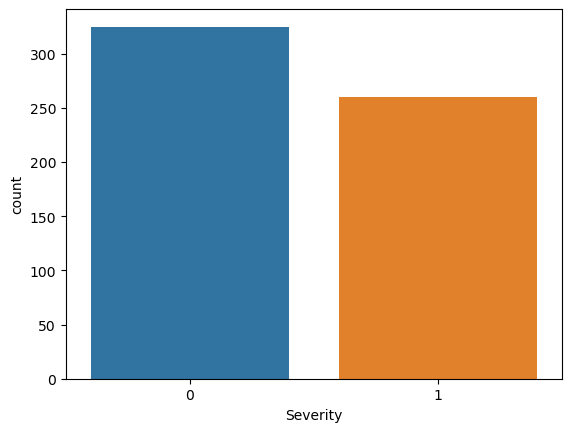

In [51]:
sns.countplot(x=train_data['Severity']);

### 🌟`Important Observations` :
- There is a less imbalance in the dataset and the datapoints are almostly equally distributed with the slight difference.

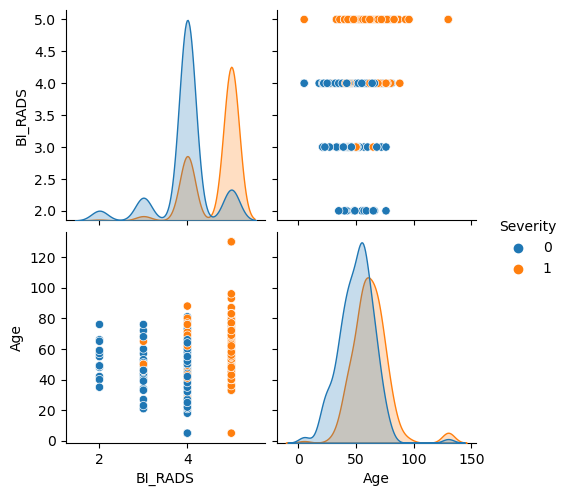

In [79]:
sns.pairplot(train_data, hue='Severity');

### 🌟`Important Observations` :
- BY observing the pairpolt we can say that whose age is between 40 to 100 and BI_rads is equal to 4 and above they are affecting more.

## *`Model Buliding`*

### Separating the Output Variablesfrom the train and test data

In [52]:
y_train = train_data['Severity']
y_test = test_data['Severity']

In [53]:
X_train = train_data.drop(['Severity'],axis=1)
X_test = test_data.drop(['Severity'],axis=1)

In [54]:
X_train.drop(['BI_RADS'],axis=1,inplace=True)
X_test.drop(['BI_RADS'],axis=1,inplace=True)

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 596
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           585 non-null    int32 
 1   Shape         585 non-null    object
 2   Margin        585 non-null    object
 3   Mass_Density  585 non-null    object
dtypes: int32(1), object(3)
memory usage: 36.7+ KB


### `Applying preprocessing on train data`

### `Rescaling the Numerical Features`

In [56]:
X_train_num = X_train.select_dtypes(include=['int32'])

In [57]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [58]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,Age
0,0.676654
1,-0.753026
2,0.140524
3,-1.646575
4,1.093644


### `Rescaling the Categorical Features`

In [59]:
# scaling the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_high,Mass_Density_iso,Mass_Density_low
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,Age,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_high,Mass_Density_iso,Mass_Density_low
0,0.676654,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.753026,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.140524,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.646575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.093644,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### `Applying preprocessing on test data`

In [61]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,Shape,Margin,Mass_Density
0,lobular,ill-defined,low
1,lobular,microlobulated,low
2,oval,circumscribed,low
3,irregular,ill-defined,fat-containing
4,lobular,microlobulated,low


### `Rescaling the Numerical Features`

In [62]:
### `Rescaling the Numerical Features`X_test_num = X_test.select_dtypes(include=['int32'])
X_test_num.head()

,Age
0,65
1,74
2,56
3,57
4,76


In [63]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,Age
0,0.557514
1,1.093644
2,0.021384
3,0.080954
4,1.212783


### `Rescaling the Categorical Features`

In [64]:
### `Rescaling the Categorical Features`X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_high,Mass_Density_iso,Mass_Density_low
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,Age,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_high,Mass_Density_iso,Mass_Density_low
0,0.557514,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.093644,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.021384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.080954,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.212783,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## *`Model Buliding and Training the model`*
### *`DecisionTree Classifier`*

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = [{'max_depth':[i for i in range(1, 20)]}]

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tuned_parameters, 
    scoring='precision',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='precision', verbose=1)

In [68]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('Precision: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 6}
DecisionTreeClassifier(max_depth=6)
Precision:  0.7727272727272727


## *`Logistics Regression`*

In [69]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

LogisticRegression()

In [70]:
from sklearn import metrics
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_pred))

Mean accuracy score:  0.7647058823529411


## *`RandomForest Classifier`*

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [72]:
y_test_predicted = classifier.predict(X_test_transformed)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})
df.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1


In [73]:
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

Mean accuracy score:  0.7132352941176471


In [74]:
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = [{'max_depth':[i for i in range(1, 20)]}]

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=tuned_parameters, 
    scoring='precision',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='precision', verbose=1)

In [75]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print('precision: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 1}
RandomForestClassifier(max_depth=1)
precision:  0.8064516129032258


## Conclusion:
- By Performing all the algorithm to the churn perdiction `RandomForestClassifier` is giving more accurate results compared to the all other algorithms.
- From the above results `RandomForestClassifier` after performing the hyperparameter the percision is 0.80.

____